# Tensorflow Code Practice

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt


In [6]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


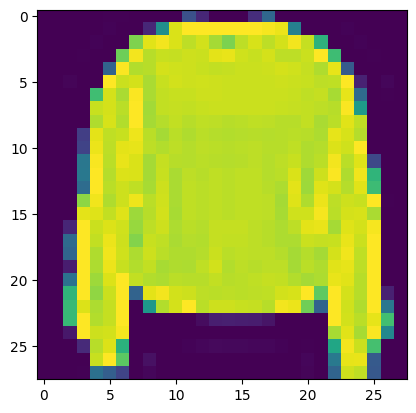

In [8]:
plt.imshow(train_data[7])

In [55]:
# Normalize the data
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

In [16]:
# Mapping labels integer to actual labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(-0.5, 27.5, 27.5, -0.5)

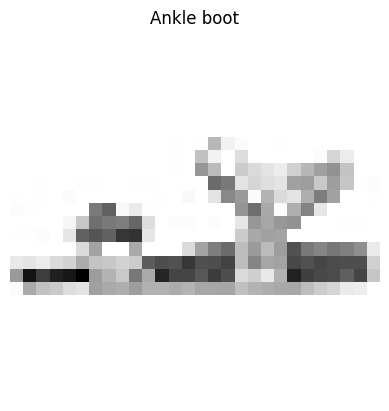

In [50]:
index = 59999
plt.imshow(train_data_norm[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.axis(False)

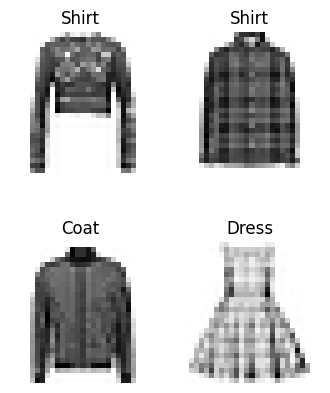

In [51]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(4, 5))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(1, len(train_data_norm)))
    plt.imshow(train_data_norm[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [56]:
# Model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_norm, train_labels, epochs=10, verbose=1, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 1.1559 - accuracy: 0.5918 - val_loss: 0.7988 - val_accuracy: 0.7246
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7245 - accuracy: 0.7439 - val_loss: 0.6978 - val_accuracy: 0.7515
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6527 - accuracy: 0.7653 - val_loss: 0.6594 - val_accuracy: 0.7609
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6229 - accuracy: 0.7796 - val_loss: 0.6314 - val_accuracy: 0.7752
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6026 - accuracy: 0.7857 - val_loss: 0.6418 - val_accuracy: 0.7746
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5881 - accuracy: 0.7905 - val_loss: 0.6140 - val_accuracy: 0.7806
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5774 - accuracy: 0.7938 - val_loss: 0.6248 - val_ac

In [53]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: title={'center': 'Loss Accuracy Graph'}>

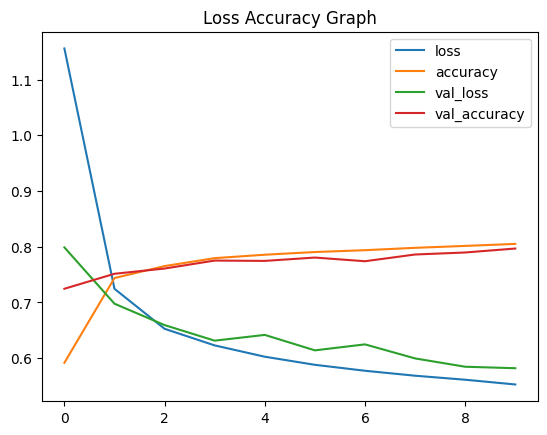

In [57]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Loss Accuracy Graph")

In [67]:
### Changing Learning Rate

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data_norm, train_labels, epochs=10, verbose=1, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.8027 - accuracy: 0.7143 - val_loss: 0.5501 - val_accuracy: 0.8161
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5031 - accuracy: 0.8279 - val_loss: 0.5538 - val_accuracy: 0.8106
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4705 - accuracy: 0.8375 - val_loss: 0.5024 - val_accuracy: 0.8219
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4510 - accuracy: 0.8459 - val_loss: 0.4881 - val_accuracy: 0.8269
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4416 - accuracy: 0.8468 - val_loss: 0.4787 - val_accuracy: 0.8325
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4300 - accuracy: 0.8516 - val_loss: 0.4932 - val_accuracy: 0.8269
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4233 - accuracy: 0.8541 - val_loss: 0.4695 - val_ac

In [71]:
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 8)                 6280      
                                                                 
 dense_67 (Dense)            (None, 8)                 72        
                                                                 
 dense_68 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

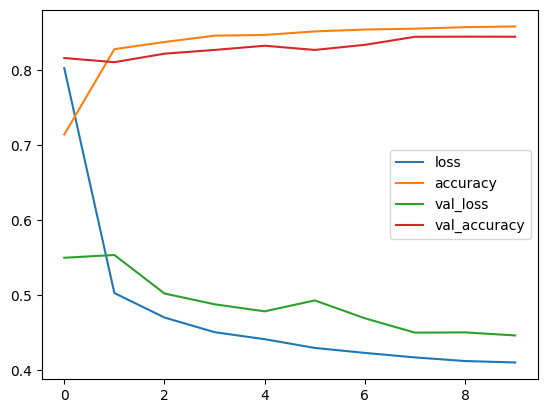

In [69]:
pd.DataFrame(history_2.history).plot()

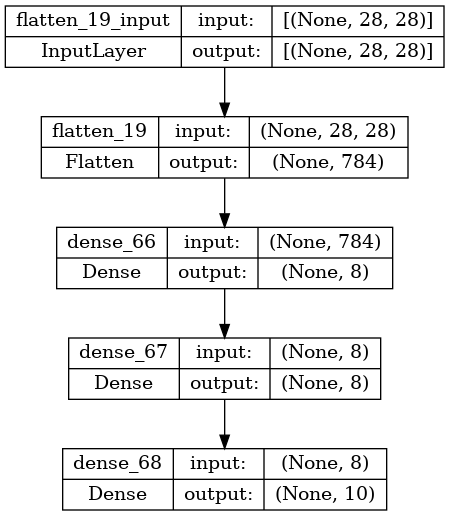

In [74]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, show_shapes=True)